In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import get_window
from scipy.io import wavfile
import IPython

In [7]:
fs, x = wavfile.read("c-major-scale.wav")
x = x / np.max(abs(x))

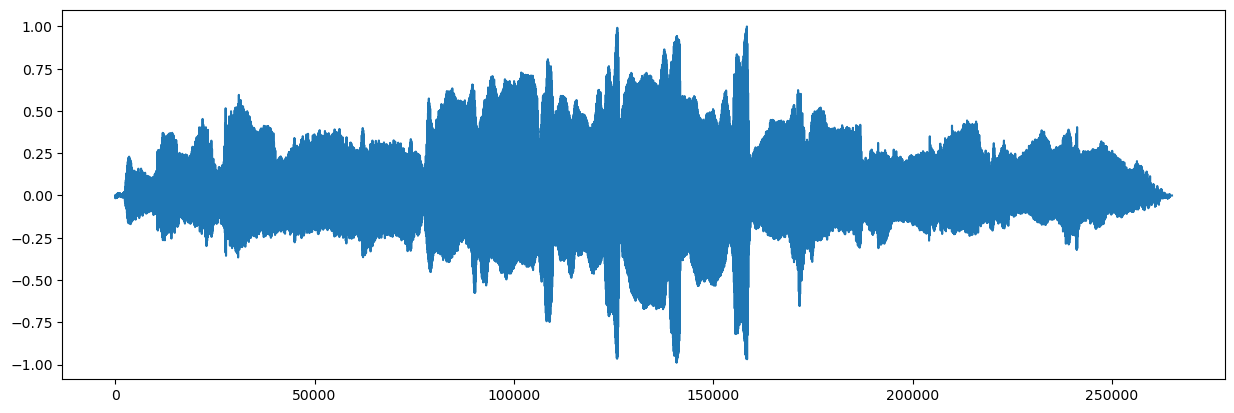

In [8]:
plt.figure().set_figwidth(15)
plt.plot(x)
IPython.display.Audio(x, rate=fs)

In [11]:
M=8191
N=8192
H=256

hM1 = int(math.floor((M + 1) / 2))
hM2 = int(math.floor(M / 2))
t=-100
eps = np.finfo(float).eps

In [12]:
w  = get_window('blackmanharris', M)
w = w / sum(w)

In [54]:
xmX = []
cepstrum = []

l = 0
while l < len(x) - M:
    x1 = x[l: l + M] * w

    fftBuffer = np.zeros(N)
    fftBuffer[: hM1] = x1[hM2:] 
    fftBuffer[N - hM2:] = x1[: hM2]

    X = fft(fftBuffer)
    
    absX = abs(X[:int(N / 2) + 1])
    
    absX[absX < np.finfo(float).eps] = np.finfo(float).eps
    
    mX = 20 * np.log10(absX)
    
    xmX.append(mX[:900])
    
    cepstrum.append(abs(fft(mX))[20:900])
    
    l += H

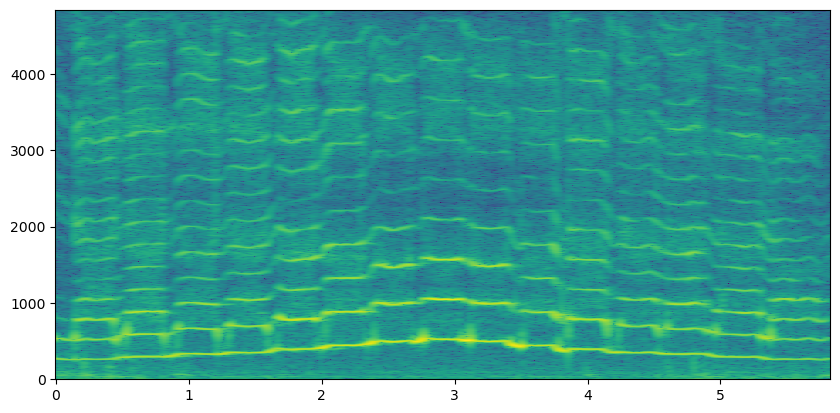

In [61]:
xmX = np.array(xmX)
plt.figure().set_figwidth(10)
t = np.arange(len(xmX)) * H / fs
fqs = np.arange(900) * fs / N
plt.pcolormesh(t, fqs, xmX.T)

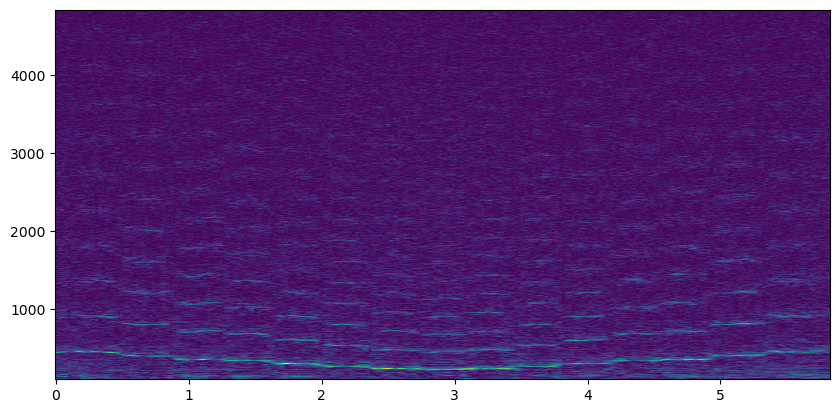

In [63]:
cepstrum = np.array(cepstrum)
plt.figure().set_figwidth(10)
t = np.arange(len(xmX)) * H / fs
fqs = np.arange(20, 900) * fs / N
plt.pcolormesh(t, fqs, cepstrum.T)